# Example

回归系数： [ 2.17508932  3.32008506  0.01963084 -0.6719427  -0.1719894  -0.08158561
  0.44600131  0.26837951 -1.17748806 -0.13326863  0.10134796 -0.43726558
  1.74570198  1.05631755]
截距： -0.034514222925123184
R^2： 0.9889364238158216


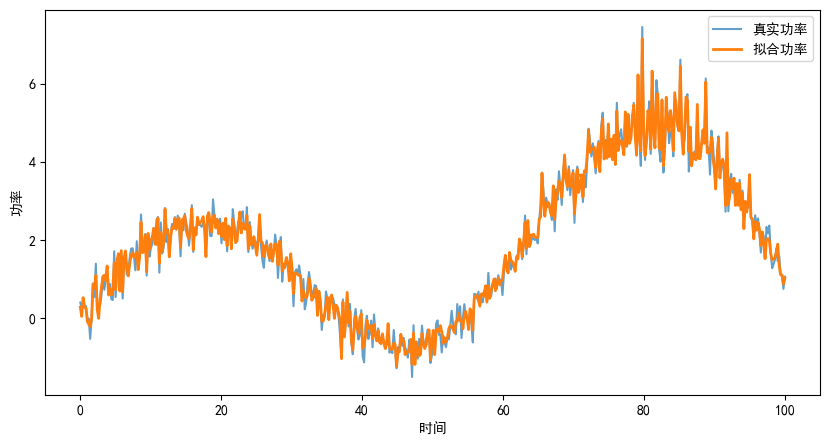

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 支持中文显示
plt.rcParams["axes.unicode_minus"] = False  # 支持负号显示
# ======================
# 假设你有三个数组：时间t, 功率P, 温度T, 光斑D
# ======================
# 示例数据（用你的真实数据替换）
np.random.seed(0)
t = np.linspace(0, 100, 500)
T = np.sin(0.1 * t) + 0.05 * np.random.randn(len(t))  # 温度信号
D = np.linspace(0, 1, len(t)) + 0.1 * np.random.randn(len(t))  # 光斑信号
P = 2 * T + 3 * D + 1.5 * T * D**4 + 0.2 * np.random.randn(len(t))  # 模拟功率

# ======================
# 建模框架
# ======================

# 构造特征矩阵
X = np.vstack([T, D]).T  # 基础特征：温度和光斑

# 用PolynomialFeatures生成交叉项
poly = PolynomialFeatures(degree=4, include_bias=False)
# degree=3表示最多到三次项，比如 D^2, T*D, T*D^2, T^2*D 等
# 你可以调低到degree=2，先试 T*D, T*D^2 这些

model = Pipeline([("poly_features", poly), ("linear_regression", LinearRegression())])

# 拟合
model.fit(X, P)

# 预测
P_pred = model.predict(X)

# ======================
# 结果评估
# ======================
print("回归系数：", model.named_steps["linear_regression"].coef_)
print("截距：", model.named_steps["linear_regression"].intercept_)
print("R^2：", model.score(X, P))

# ======================
# 可视化
# ======================
plt.figure(figsize=(10, 5))
plt.plot(t, P, label="真实功率", alpha=0.7)
plt.plot(t, P_pred, label="拟合功率", linewidth=2)
plt.xlabel("时间")
plt.ylabel("功率")
plt.legend()
plt.show()

# 完成多变量多项式线性拟合


=== poly模式多项式回归结果 ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.179e+05
Date:                  周四, 25 9月 2025   Prob (F-statistic):               0.00
Time:                        00:32:47   Log-Likelihood:                 1001.0
No. Observations:                5000   AIC:                            -1982.
Df Residuals:                    4990   BIC:                            -1917.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0105      0.

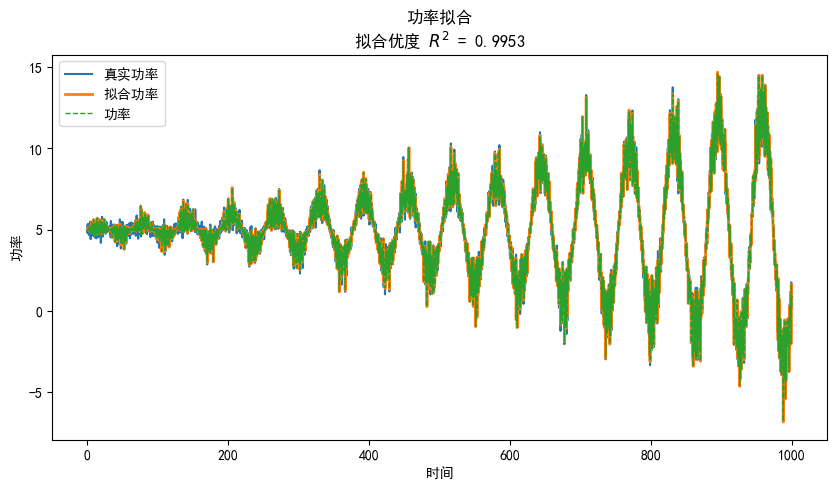

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

# ======================
# 示例数据（换成你的真实数据）
# ======================
np.random.seed(0)
t = np.linspace(0, 1000, 5000)
T = np.sin(0.1 * t) + 0.05 * np.random.randn(len(t))  # 温度
D = np.linspace(0, 1, len(t)) + 0.1 * np.random.randn(len(t))  # 光斑
P = 5 + 3 * T * D + 5 * T * D**2 + 0.2 * np.random.randn(len(t))  # 功率

# ======================
# 模式选择
# ======================
mode = "poly"  # "poly" 或 "custom"

if mode == "poly":
    # ------------------
    # 全多项式回归
    # ------------------
    degree = 3
    X = np.vstack([T, D]).T
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    feature_names = poly.get_feature_names_out(["T", "D"])

    # statsmodels 回归
    X_sm = sm.add_constant(X_poly)  # 加常数项
    model = sm.OLS(P, X_sm).fit()
    # 提取结果
    pvalues = model.pvalues
    coefs = model.params

    print("\n=== poly模式多项式回归结果 ===")
    print(model.summary(xname=["Intercept"] + list(feature_names)))
    
    selected_features = []
    selected_coefs = []
    for name, coef, p in zip(["常数"] + list(feature_names), coefs, pvalues):
        if p < 0.01:
            selected_features.append(name)
            selected_coefs.append(coef)
        # 打印拟合公式
    params = model.params
    formula_terms = [f"{params[i]:.3f}·{name}" for i, name in enumerate(["Intercept"] + list(feature_names))]
    formula = " + ".join(formula_terms)
    print("\n"+"*" * 100)
    print("=== 【拟合得到的功率公式】： ===")
    for name, coef in zip(selected_features, selected_coefs):
        print(f"变量 {name:6s} 的回归系数为 {coef:.4f}")
    print("*" * 100)
    print("P =", formula)
    print("原公式：P = 3 * T * D + 1.5 * T * D**2 + 0.2 * np.random.randn(len(t))  # 功率")

elif mode == "custom":
    # ------------------
    # 精简版：T, D, T*D, T*D^2
    # ------------------
    X = np.column_stack([T, D, T * D, T * D**2])
    feature_names = ["T", "D", "T*D", "T*D^2"]

    # statsmodels 回归
    X_sm = sm.add_constant(X)  # 加常数项
    model = sm.OLS(P, X_sm).fit()
    
    # 提取结果
    pvalues = model.pvalues
    coefs = model.params

    print("\n=== 精简版回归结果 ===")
    print(model.summary(xname=["Intercept"] + feature_names))
    selected_features = []
    selected_coefs = []
    for name, coef, p in zip(["常数"] + feature_names, coefs, pvalues):
        if p < 0.01:
            selected_features.append(name)
            selected_coefs.append(coef)

    # 打印拟合公式
    params = model.params
    formula_terms = [f"{params[i]:.3f}·{name}" for i, name in enumerate(["Intercept"] + feature_names)]
    formula = " + ".join(formula_terms)
    print("\n"+"*" * 100)
    print("=== 【拟合得到的功率公式】： ===")
    for name, coef in zip(selected_features, selected_coefs):
        print(f"变量 {name:6s} 的回归系数为 {coef:.4f}")
    print("*" * 100)
    print("P =", formula)
    print("原公式：P = 3 * T * D + 1.5 * T * D**2 + 0.2 * np.random.randn(len(t))  # 功率")
    

# ======================
# 可视化拟合效果
# ======================
# P_pred 是通过 statsmodels 的线性回归模型 model 对特征矩阵 X_sm 进行预测得到的
P_pred = model.predict(X_sm)
P_p = 2.935*T* D +5.026*T*D**2 +5

P_fit = model.predict(X_sm)
r2 = model.rsquared
print(f"\n拟合优度 R² = {r2:.4f}")

# 拟合得到的功率公式如下（多项式回归 degree=3）：
# P = 0.011·Intercept + 0.016·T + -0.120·D + -0.005·T^2 + 2.935·T D + 0.280·D^2 + 0.008·T^3 + -0.002·T^2 D + 5.026·T D^2 + -0.160·D^3

plt.figure(figsize=(10, 5))
plt.plot(t, P, label="真实功率")
plt.plot(t, P_pred, label="拟合功率", linewidth=2)
plt.plot(t, P_p, label="功率", linewidth=1, linestyle='--')
plt.xlabel("时间")
plt.ylabel("功率")
plt.title(f'功率拟合\n拟合优度 $R^2$ = {r2:.4f}')
plt.legend()
plt.show()

### 1.回归整体统计量（表头部分）

* Dep. Variable：因变量的名字（这里是 P）。

* R-squared：决定系数𝑅2，表示拟合优度。1 越好。

* Adj. R-squared：调整后的𝑅2，修正了变量个数的影响。

* F-statistic：回归方程整体的显著性检验统计量。

* Prob (F-statistic)：F 检验的 p 值，越小说明整体回归显著。

* Log-Likelihood：似然函数对数值，用于模型比较。

* AIC / BIC：信息准则，用来比较模型复杂度与拟合度。

### 2. 系数表（Coefficient table）

每一行对应一个变量：

* coef：回归系数估计值。

* std err：系数的标准误差。

* t：t 检验统计量，用来检验该系数是否显著不为 0。

* P>|t|：对应的 p 值，通常小于 0.05 说明显著。

* [0.025, 0.975]：95% 置信区间。

### 3. 底部诊断信息

* Omnibus / Prob(Omnibus)：残差是否正态的检验。

* Durbin-Watson：残差自相关检验，接近 2 较好。

* Jarque-Bera (JB)：另一种正态性检验。

* Skew / Kurtosis：残差偏度与峰度。

* Cond. No.：条件数，大时提示多重共线性问题。